# Bezoekers in een pretpark
Een pretpark wil kunnen voorspellen hoeveel bezoekers er zullen komen in een bepaalde maand. Daarvoor hebben ze gedurende 4 jaar opgeschreven hoeveel bezoekers er waren, voor iedere maand. Je vindt deze data in “pretpark.csv”.  Deze data is ook direct leesbaar in Python (geen foute of ontbrekende data). Je moet wel zorgen dat de kolom `aantal_bezoekers` een float wordt.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

pretpark = pd.read_csv('data/pretpark.csv', sep=';')
pretpark['aantal_bezoekers'] = pretpark['aantal_bezoekers'].astype(float)
display(pretpark)

,jaar,maand,aantal_bezoekers
0,1,1,120.0
1,1,2,89.0
2,1,3,492.0
3,1,4,586.0
4,1,5,1300.0
5,1,6,1173.0
6,1,7,1688.0
7,1,8,1715.0
8,1,9,528.0
9,1,10,247.0


1.1. Maak een grafiek van de data.
1.2. Wat merk je visueel op?
1.3. Stijgt of daalt het aantal bezoekers?
1.4. Is er een patroon herkenbaar?

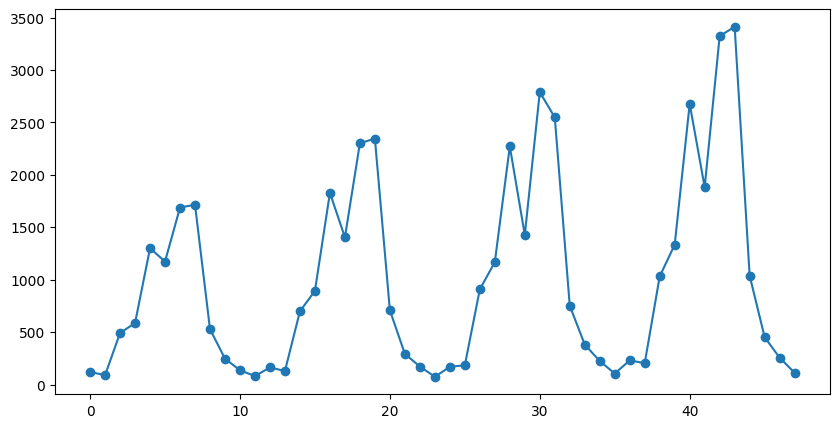

In [2]:
from matplotlib import pyplot as plt

# 1.1.
fig, ax = plt.subplots(figsize=(10, 5))
_ = ax.plot(pretpark.aantal_bezoekers, marker='o')

# 1.2. Er zijn 4 verschillende piekmomenten rond maand 8.
# 1.3. Het stijgt elk jaar.
# 1.4. Er zijn 4 piekmomenten rond maand 8 (Er zijn 4 verschillende seizoenen).

2.	Zou je het additief of multiplicatief model gebruiken?

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

aantal_bezoekers = pretpark['aantal_bezoekers']
sd_model = seasonal_decompose(aantal_bezoekers, model='multiplicative', period=12)
seasonal_std = np.std(sd_model.seasonal)
residual_std = np.std(sd_model.resid)
std_ratio = seasonal_std/residual_std

if std_ratio > 1:
	print("Multiplicativemodel")
else:
	print("Additivemodel")

# Dus Multiplicativemodel

Multiplicativemodel


3.	Wat is de grootte van 1 “seizoen”?

,lags,acf
15,0,1.000000
14,-1,0.851222
16,1,0.851222
27,12,0.717162
3,-12,0.717162
13,-2,0.706838
17,2,0.706838
28,13,0.613126
2,-13,0.613126
4,-11,0.610027


Periode: [12]


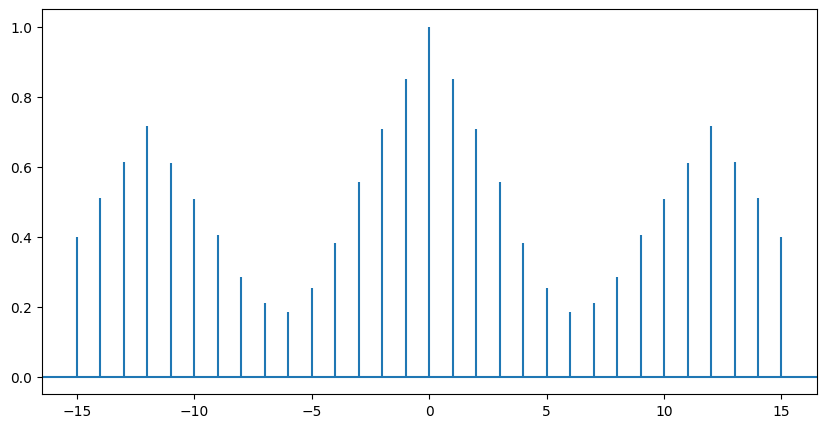

In [4]:
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt

def find_period(y: np.array, maxlags=10, top_n=1) -> int:
    acf_vals = acf(y, nlags=maxlags)
    return (np.argsort(-1 * acf_vals)[1:top_n+1])

aantal_bezoekers = pretpark['aantal_bezoekers']

fig, ax = plt.subplots(figsize=(10, 5))
lags, acfs, _, _ = ax.acorr(aantal_bezoekers, maxlags=15)
autocorrelatie = pd.DataFrame({'lags': lags, 'acf': acfs}).sort_values(by='acf', ascending=False)
display(autocorrelatie)

periode = find_period(aantal_bezoekers, maxlags=20, top_n=1)
print("Periode:", periode)

# Uit de gegeven resultaten kunnen we zien dat het paar met het hoogste absolute laggetal (12 en -12) een autocorrelatiecoëfficiënt heeft van 0.717162. Dit geeft aan dat er een herhalend patroon is dat zich elke 12 tijdseenheden (bijvoorbeeld maanden, kwartalen) voordoet.

4.	Doe nu een decompositie.  Plot deze in een diagram.

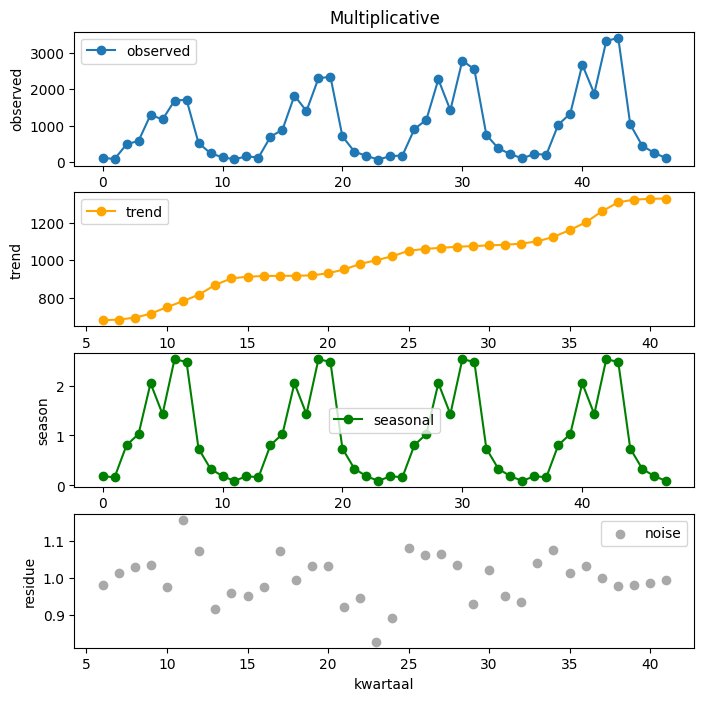

In [5]:
from W20P4.forecast import plot_seasonal_decompositon

plot_seasonal_decompositon(sd_model, 'Multiplicative')
# sd_model.observed
# sd_model.trend
# sd_model.seasonal
# sd_model.resid

5.	We gaan nu een model maken om voorspellingen te doen naar de toekomst. Doe een lineaire regressie op de trend en bepaal de slope en de intercept. Welke vergelijking vind je voor de trend?

In [6]:
from W20P4.forecast import GeneralRegression

sd_model = seasonal_decompose(aantal_bezoekers, model='multiplicative', period=12)
reg_model = GeneralRegression()
x = np.arange(0, sd_model.trend.size)[~np.isnan(sd_model.trend)]
y = sd_model.trend[~np.isnan(sd_model.trend)]
reg_model.fit(x, y)

print("Slope", reg_model.coef_[1], "\nIntercept", reg_model.intercept_)

Slope 17.256225868725863 
Intercept 596.9266087516089


6.	Bereken de waarden van de trend voor het komende jaar.  Welke waarden kom je uit?

array([ 264.52708869,  233.69501885, 1177.53997239, 1519.50994787,
       3057.16309306, 2155.94684296, 3863.01246423, 3822.0353943 ,
       1153.11623686,  526.4247529 ,  296.27318478,  144.42544994])

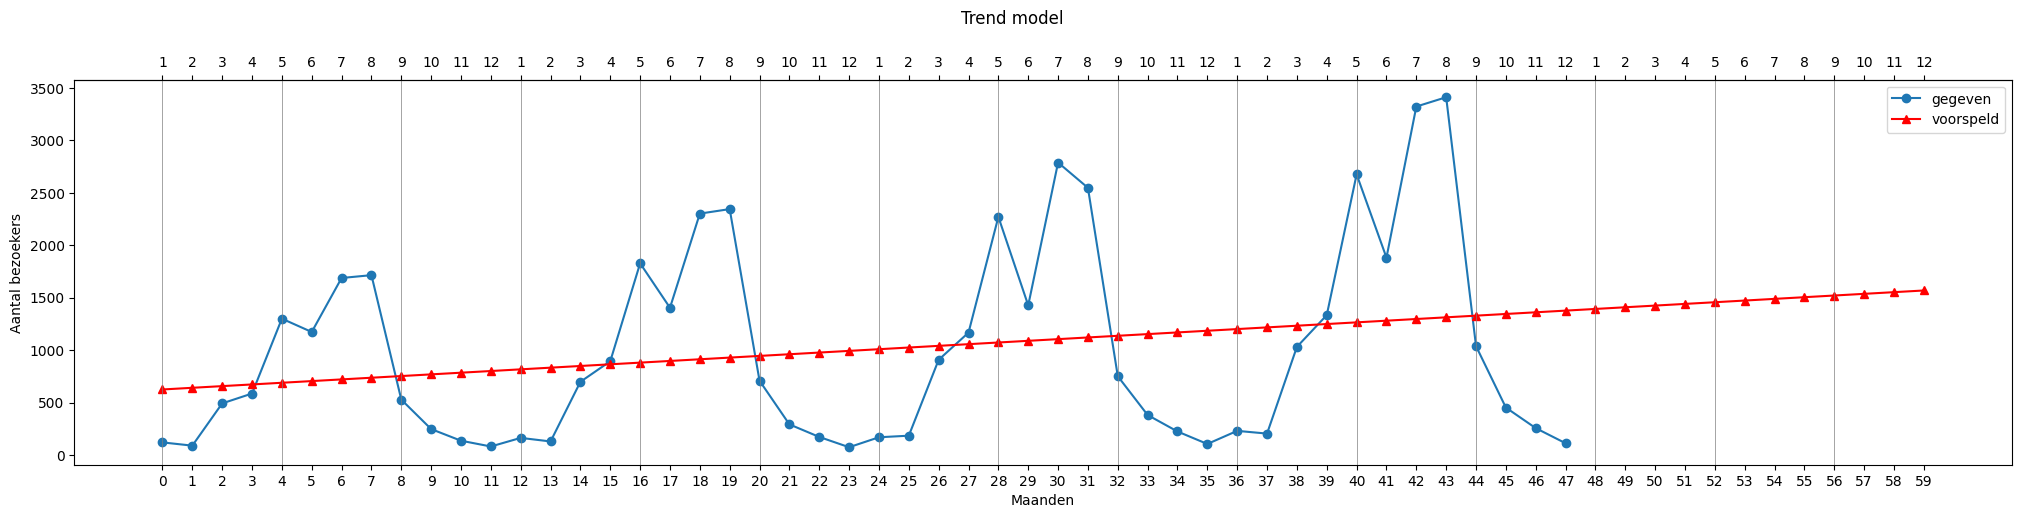

In [7]:
from W20P4.forecast import create_trend_model, seasonal_decomposition_forecast


def plot_trends(y1: np.array, y2=None, sub_title=None, label1='gegeven', label2='voorspeld', color='C0', ax=None):
    if y2 is not None:
        n = max(y1.size, y2.size)
    else:
        n = y1.size

    if not ax:
        fig, ax = plt.subplots(figsize=(25, 5))
    else:
        fig = ax.figure

    if sub_title:
        fig.suptitle(sub_title, y=1.02)

    ax.set_xlabel('Maanden')
    ax.set_ylabel('Aantal bezoekers')
    ax2 = ax.secondary_xaxis('top')
    ax2.set_xticks(range(n))
    ax2.set_xticklabels(['{}'.format(j % 12 + 1) for j in range(n)])

    ax.set_xticks(range(n))
    ax.plot(y1, label=label1, color=color, marker='o')
    if y2 is not None:
        ax.plot(y2, label=label2, color='red', marker='^')
    for i in range(0, n, 4):
        ax.axvline(i, color='gray', linewidth=0.5)

    ax.legend()

predict_trend = create_trend_model(pretpark.aantal_bezoekers)
plot_trends(aantal_bezoekers, predict_trend(np.arange(60)), 'Trend model')

trend_waarden = predict_trend(np.arange(60)) # Trend waarden

predictionData = seasonal_decomposition_forecast(reg_model, sd_model, 48, 60, method='multiplicative', m=12)
display(predictionData)

7.	Wat zijn de waarden van het seizoen?

In [8]:
waarden_seizoen = pd.DataFrame(sd_model.seasonal.to_numpy().reshape(-1, 12), columns=range(1, 13))
display(waarden_seizoen)

,1,2,3,4,5,6,7,8,9,10,11,12
0,0.185604,0.162009,0.806679,1.028785,2.045951,1.426356,2.526888,2.472179,0.737628,0.333068,0.185427,0.089425
1,0.185604,0.162009,0.806679,1.028785,2.045951,1.426356,2.526888,2.472179,0.737628,0.333068,0.185427,0.089425
2,0.185604,0.162009,0.806679,1.028785,2.045951,1.426356,2.526888,2.472179,0.737628,0.333068,0.185427,0.089425
3,0.185604,0.162009,0.806679,1.028785,2.045951,1.426356,2.526888,2.472179,0.737628,0.333068,0.185427,0.089425


8.	Vermenigvuldig de trend-waarden nu met het patroon. Je hebt nu een schatting van het aantal bezoekers voor het volgende jaar.  Welke waarden kom je uit (rond de waarden af op een geheel getal)?

array([ 264.52708869,  233.69501885, 1177.53997239, 1519.50994787,
       3057.16309306, 2155.94684296, 3863.01246423, 3822.0353943 ,
       1153.11623686,  526.4247529 ,  296.27318478,  144.42544994])

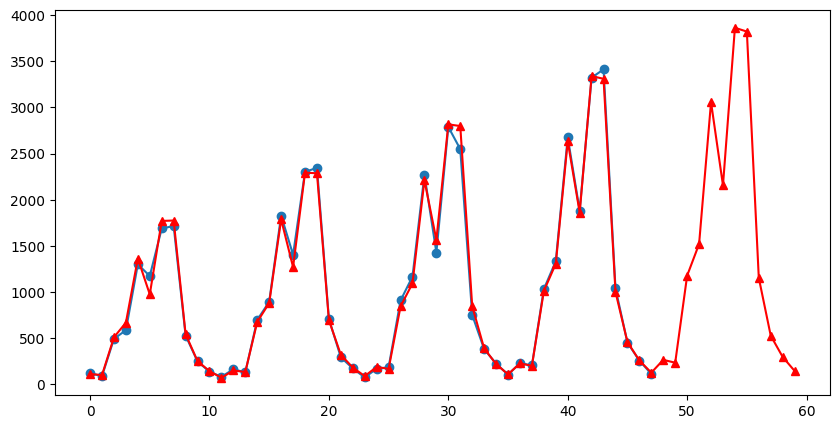

In [14]:
from W20P4.forecast import seasonal_decomposition_forecast

prediction = seasonal_decomposition_forecast(reg_model, sd_model, 0, 60, method='multiplicative', m=12)
fig, ax = plt.subplots(figsize=(10, 5))
_ = ax.plot(pretpark.aantal_bezoekers, marker='o')
_ = ax.plot(prediction, marker='^', color='red')

prediction = seasonal_decomposition_forecast(reg_model, sd_model, 48, 60, method='multiplicative', m=12)
display(prediction)

9.	Wat is de MAE, RMSE en de MAPE? Wat is de betekenis van de MAPE?

In [28]:
from W20P4.forecast import forecast_errors

MAPE = np.nanmean(np.abs(sd_model.resid / pretpark.aantal_bezoekers))
MAE = np.nanmean(np.abs(sd_model.resid))
RMSE = np.sqrt(np.nanmean(np.square(sd_model.resid)))

metrics_df = pd.DataFrame({'Metric': ['MAPE', 'MAE', 'RMSE'], 'Value': [MAPE, MAE, RMSE]})
display(metrics_df)


n = pretpark.aantal_bezoekers.size
predictions = seasonal_decomposition_forecast(reg_model, sd_model, 0, 48, method='multiplicative', m=12)
errors = forecast_errors(pretpark.aantal_bezoekers, predictions, method='multiplicative_model')
display(errors)

# MAPE staat voor Mean Absolute Percentage Error
# Het geeft aan in een percentage hoe groot de afwijking is tussen de geobserveerde informatie en de voorspelling.

,Metric,Value
0,MAPE,0.003160
1,MAE,0.998512
2,RMSE,1.000459


,MAE,RMSE,MAPE
multiplicative_model,41.173772,65.831631,0.055157
